# Clustering on air traffic control data

In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def nulls(df, percentage=False):
    if not percentage:
        return df.isnull().sum()[df.isnull().sum() > 0]
    return df.isnull().sum()[df.isnull().sum() > 0] * 100 / len(df)

In [2]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


## EDA

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Activity Period,18885.0,201179.285994,385.755460,200507.0,200811.0,201204.0,201509.0,201806.0
Passenger Count,18885.0,29876.744400,60626.072969,1.0,5352.0,9170.0,20718.0,659837.0


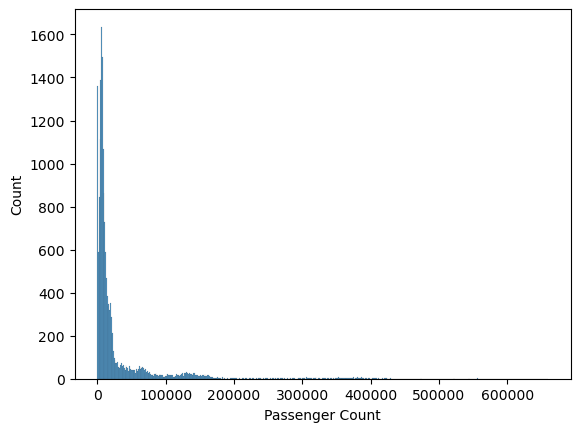

In [6]:
sns.histplot(x=df['Passenger Count']);

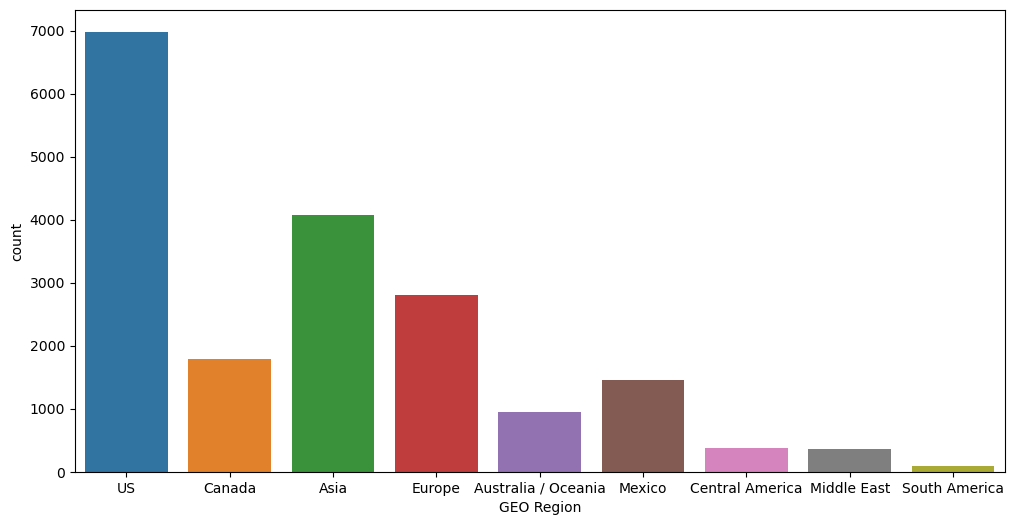

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['GEO Region'], hue=df['GEO Region'], legend=False);

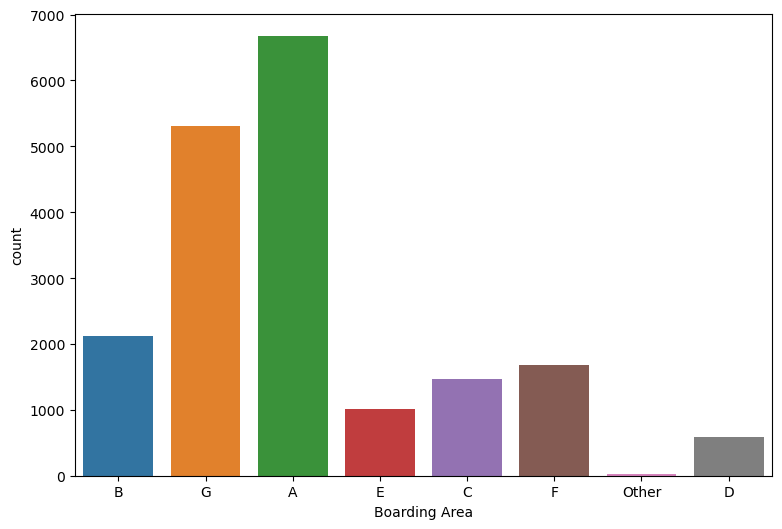

In [8]:
plt.figure(figsize=(9, 6))
sns.countplot(x=df['Boarding Area'], hue=df['Boarding Area'], legend=False);

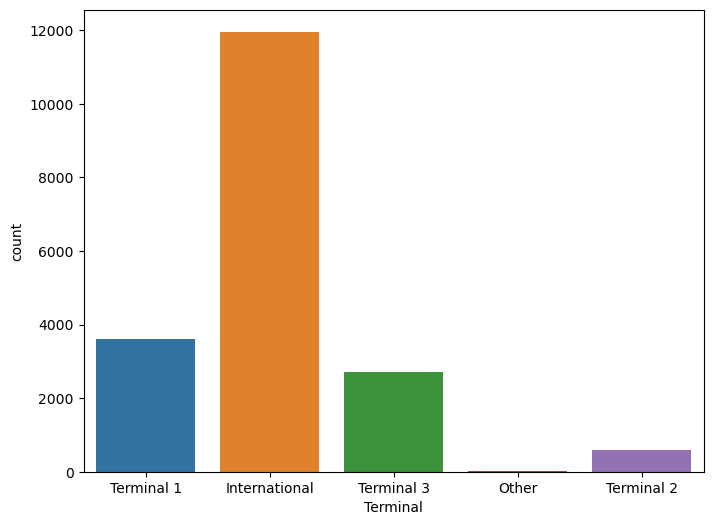

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Terminal'], hue=df['Terminal'], legend=False);

In [10]:
nulls(df)

Operating Airline IATA Code    63
Published Airline IATA Code    63
dtype: int64

In [11]:
nulls(df, percentage=True)

Operating Airline IATA Code    0.333598
Published Airline IATA Code    0.333598
dtype: float64

In [12]:
df[['Operating Airline IATA Code', 'Published Airline IATA Code']].sample(20)

,Operating Airline IATA Code,Published Airline IATA Code
14529,AS,AS
4041,UA,UA
3332,UA,UA
1850,AS,AS
16462,UA,UA
2575,YV,US
15990,CX,CX
2631,UA,UA
9331,DL,DL
1666,NW,NW


In [13]:
df[df['Operating Airline IATA Code'] != df['Published Airline IATA Code']]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
25,200507,American Eagle Airlines,MQ,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,5493
26,200507,American Eagle Airlines,MQ,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,5213
29,200507,Atlantic Southeast Airlines,EV,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,1552
30,200507,Atlantic Southeast Airlines,EV,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,1484
47,200507,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,5284
48,200507,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,5257
61,200507,Mesa Airlines,YV,US Airways,US,Domestic,US,Deplaned,Other,Terminal 1,B,2636
62,200507,Mesa Airlines,YV,US Airways,US,Domestic,US,Enplaned,Other,Terminal 1,B,2535
75,200507,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,7262
76,200507,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,6586


In [14]:
df[df['Operating Airline IATA Code'].isnull()][['Operating Airline IATA Code', 'Published Airline IATA Code']]

,Operating Airline IATA Code,Published Airline IATA Code
148,NaN,NaN
6809,NaN,NaN
6810,NaN,NaN
6920,NaN,NaN
6921,NaN,NaN
7168,NaN,NaN
7169,NaN,NaN
7742,NaN,NaN
7743,NaN,NaN
7967,NaN,NaN


The two columns that have nan values are always nan in the same row. Since we already have the columns that show the name of the airline company for both the Operating Airline and Published Airline, the column that shows the code for these is not really necessarry. We can drop these columns.

In [15]:
df.drop(['Operating Airline IATA Code', 'Published Airline IATA Code'], axis=1, inplace=True)

In [16]:
nulls(df)

Series([], dtype: int64)

And with that we have no nan values in the table. Here is the final state of the table.

In [17]:
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090


## Modelling

In [18]:
# !pip install kmodes

In [19]:
from kmodes.kmodes import KModes
from kmodes import kprototypes
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import numpy as np

In [20]:
x_cat = df.select_dtypes(include=['object'])
x_num = df.select_dtypes(include=['int64'])

We will run KModes on categorical values (x_cat) and KMeans on numerical values (x_num)

### Categorical Values

Sources used for KModes clustering:

- [K-Modes Clustering For Categorical Data in Python](https://codinginfinite.com/k-modes-clustering-for-categorical-data-in-python/)
- [Elbow Method in Python for K-Means and K-Modes Clustering](https://codinginfinite.com/elbow-method-in-python-for-k-means-and-k-modes-clustering/)

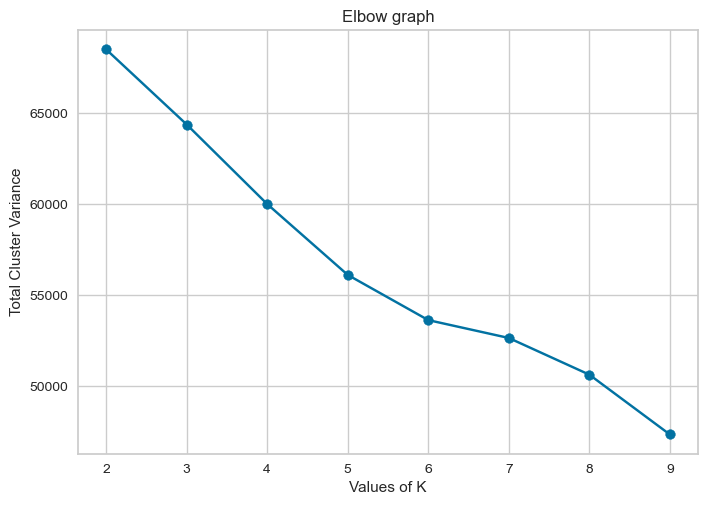

In [21]:
elbow_scores = dict()
K = range(2, 10) 

for k in K:
    untrained_model = KModes(n_clusters=k, n_init=4)
    trained_model = untrained_model.fit(x_cat)
    elbow_scores[k] = trained_model.cost_

plt.plot(elbow_scores.keys(), elbow_scores.values())
plt.scatter(elbow_scores.keys(), elbow_scores.values())
plt.xlabel("Values of K") 
plt.ylabel("Total Cluster Variance") 
plt.title("Elbow graph");
plt.show()

It looks like there is an elbow point here at k=6. Lets use it for now.

In [22]:
kmodes = KModes(6, random_state=42)
pred_cat = kmodes.fit_predict(x_cat)

# Does not work because we are working with categorical variables.
# score = silhouette_score(x_cat, pred)
# print(f"Silhoutette score: {score:.2f}")

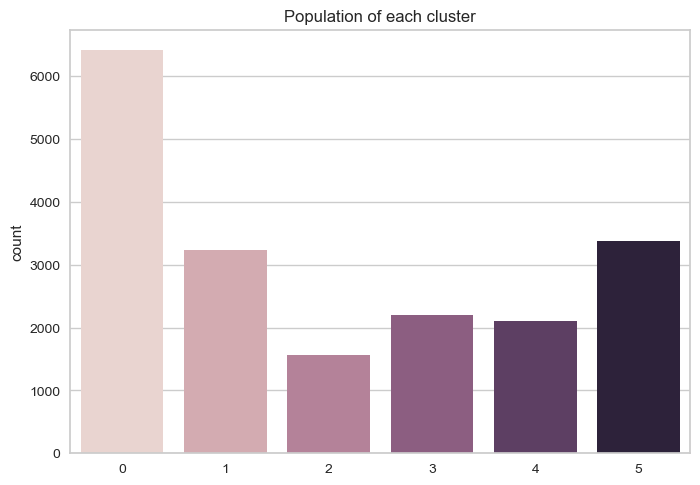

In [23]:
plt.title("Population of each cluster");
sns.countplot(x=pred_cat, hue=pred_cat, legend=False);

### Numerical Values

In [24]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

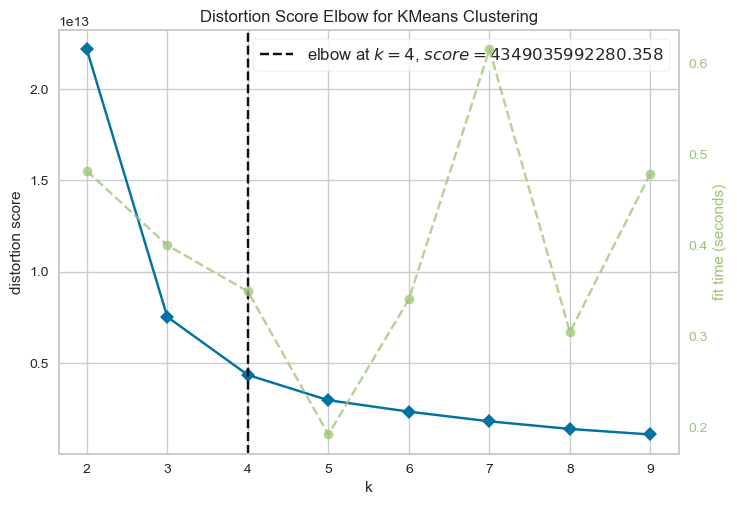

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
visualizer.fit(x_num)
visualizer.show()

In [26]:
model = KMeans(4, random_state=42)
pred_num = model.fit_predict(x_num)

score = silhouette_score(x_num, pred_num)
print(f"Silhouette score: {score:.2f}")

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.79


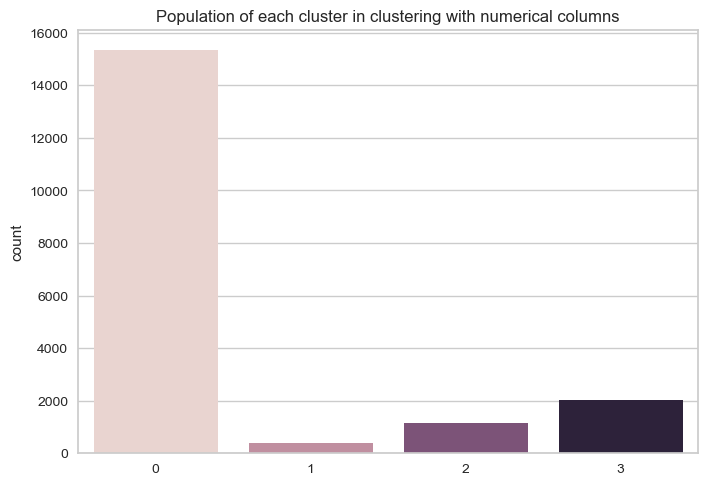

In [27]:
plt.title("Population of each cluster in clustering with numerical columns");
sns.countplot(x=pred_num, hue=pred_num, legend=False);

### Get Dummies

We will convert the categorical variables with get_dummies and then cluster them with KMeans.

In [28]:
dummies = pd.get_dummies(df)
dummies.head()

,Activity Period,Passenger Count,Operating Airline_ABC Aerolineas S.A. de C.V. dba Interjet,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Published Airline_ABC Aerolineas S.A. de C.V. dba Interjet,Published Airline_ATA Airlines,Published Airline_Aer Lingus,Published Airline_Aeromexico,Published Airline_Air Berlin,Published Airline_Air Canada,Published Airline_Air China,Published Airline_Air France,Published Airline_Air India Limited,Published Airline_Air New Zealand,Published Airline_Air Pacific Limited dba Fiji Airways,Published Airline_AirTran Airways,Published Airline_Alaska Airlines,Published Airline_All Nippon Airways,Published Airline_Allegiant Air,Published Airline_American Airlines,Published Airline_Ameriflight,Published Airline_Asiana Airlines,"Published Airline_Atlas Air, Inc",Published Airline_BelAir Airlines,Published Airline_Boeing Company,Published Airline_British Airways,"Published Airline_COPA Airlines, Inc.",Published Airline_Cathay Pacific,Published Airline_China Airlines,Published Airli

In [29]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

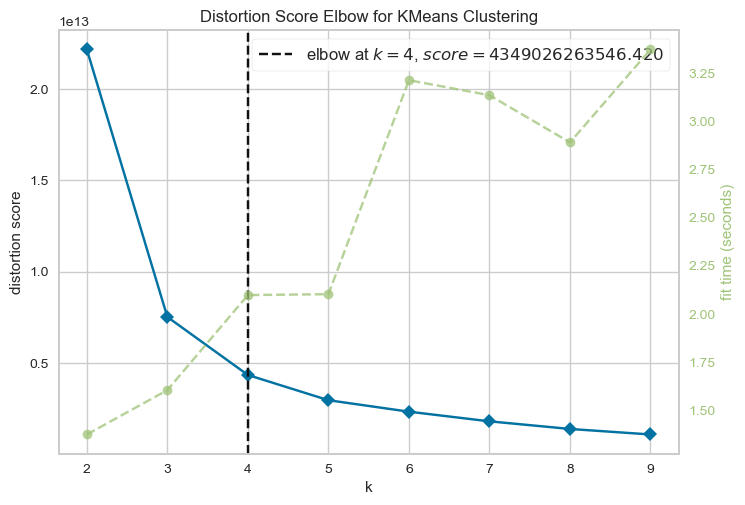

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
visualizer.fit(dummies)
visualizer.show()

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.79


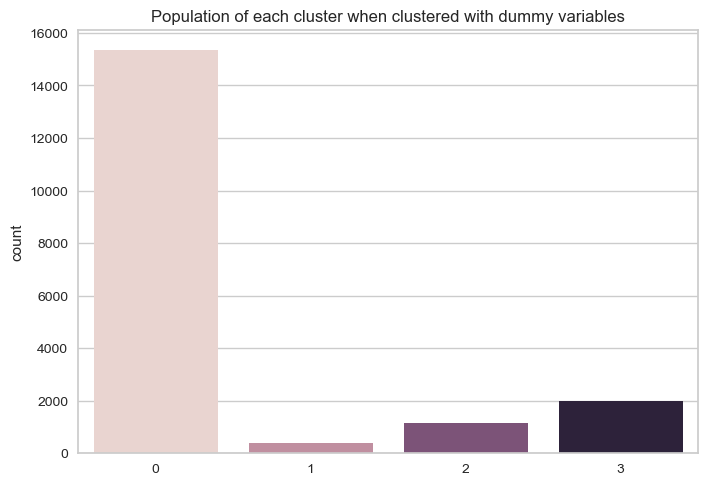

In [31]:
model = KMeans(4, random_state=42)
pred_dummies = model.fit_predict(dummies)

score = silhouette_score(dummies, pred_dummies)
print(f'Silhouette score: {score:.2f}')

plt.title("Population of each cluster when clustered with dummy variables");
sns.countplot(x=pred_dummies, hue=pred_dummies, legend=False);

## Conclusion

I started off by taking a look at the data and plotting some columns. After that I took a look at the missing values. Conviniently, only missing values were from columns that gave airline IATA codes, and the data already have columns with no missing values that give the full name of the airline. So dropping these columns meant no meaningful data lost. I then moved on to the clustring of this data. I used 3 main approaches: Using the numerical columns in this data with KMeans, using the categorical columns in the data with KModes and finally using the entire data with dummy variables for categorical values with KMeans. I used the elbow method to get the optimal cluster count, and ran the appropriate clustering model. I then plotted the results.